In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

cancer=load_breast_cancer()

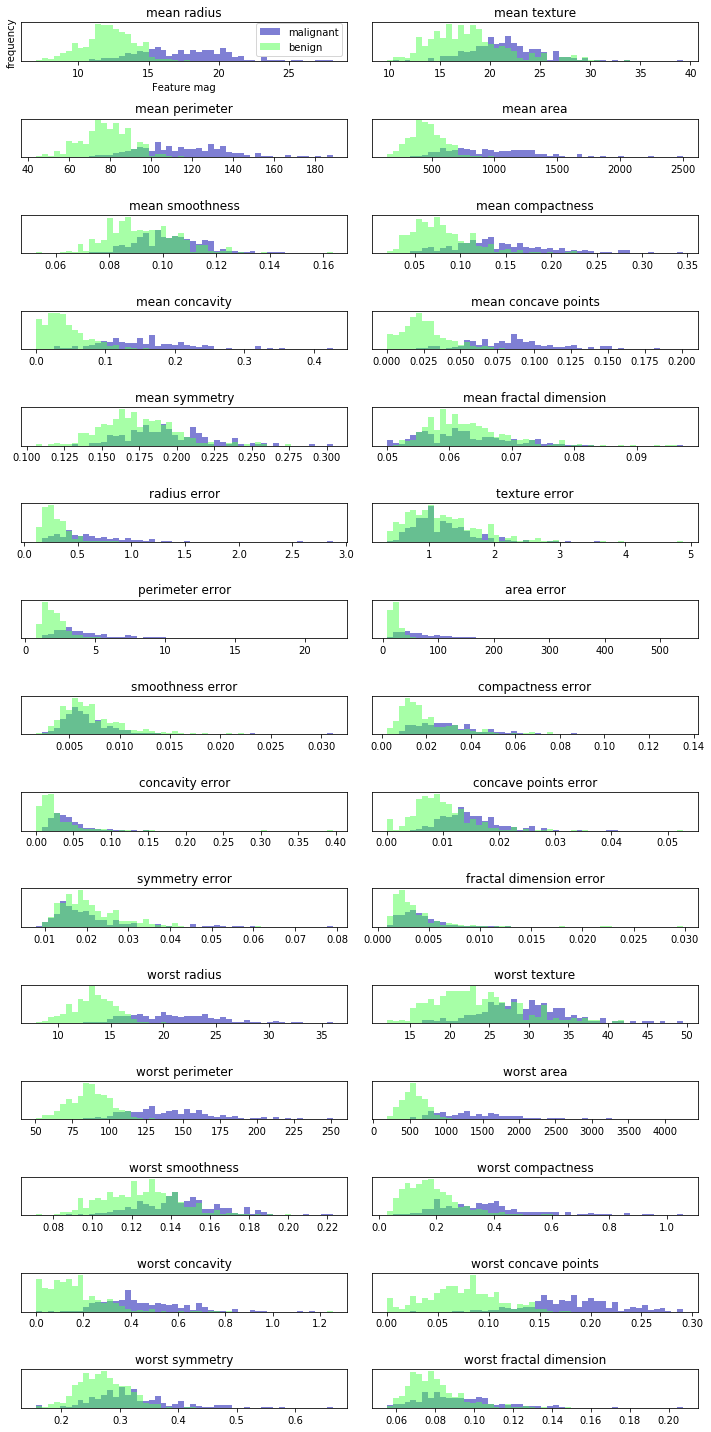

In [8]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature mag")
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()
plt.show()

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(cancer.data)

In [16]:
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print('og shape: {}'.format(X_scaled.shape))
print('reduced shape: {}'.format(X_pca.shape))

og shape: (569, 30)
reduced shape: (569, 2)


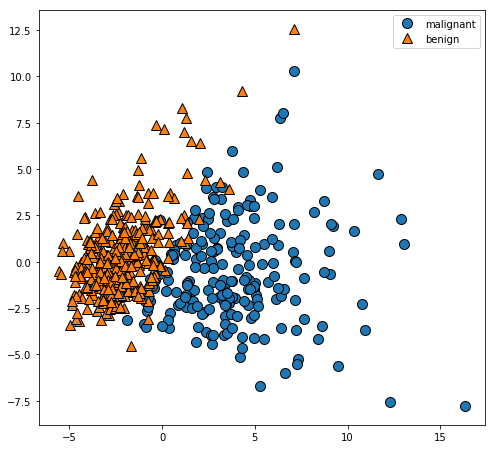

In [20]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.show()

In [22]:
print('PCA component shape: {}'.format(pca.components_.shape))

PCA component shape: (2, 30)


In [23]:
print('pca components: {}'.format(pca.components_))

pca components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


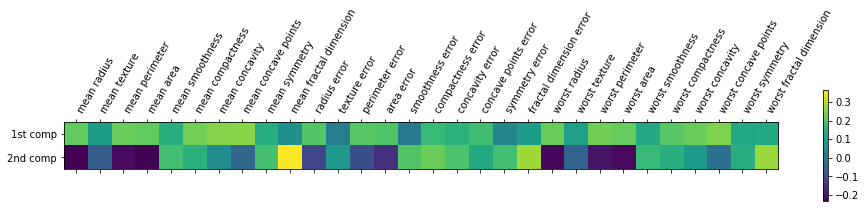

In [27]:
#lets use a heat map

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['1st comp','2nd comp'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')

plt.show()